# Creating Lagged Features and Evaluating a Linear Regression Model

In [1]:
pip install scikit-learn numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 914.8 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 690.6 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 1.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 33.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 26.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 22.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 32.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 2.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 30.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.

In [6]:
import os
import numpy as np
import pandas as pd

# Paths (adjust if needed)
base_dir = "/work/AML_Project/Data/Data_DownloadedFolders"
output_dir = "/work/AML_Project/Data/CSV_Files"

os.makedirs(output_dir, exist_ok=True)

for folder_name in os.listdir(base_dir):
    # Skip folders that contain "s5_" in their name
    if "s5_" in folder_name:
        print(f"Skipping folder: {folder_name}")
        continue

    folder_path = os.path.join(base_dir, folder_name)

    if os.path.isdir(folder_path) and folder_name.startswith("s"):
        # Identify EDA, BVP files
        csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        eda_files = [f for f in csv_files if "eda_" in f.lower()]
        bvp_files = [f for f in csv_files if "bvp_" in f.lower()]

        # -- EDA --
        eda_list = []
        for eda_file in eda_files:
            csv_path = os.path.join(folder_path, eda_file)
            df_eda = pd.read_csv(csv_path, header=None, names=["eda"])
            eda_list.append(df_eda)

        if eda_list:
            eda_df = pd.concat(eda_list, ignore_index=True)
        else:
            eda_df = pd.DataFrame(columns=["eda"])

        # -- BVP --
        bvp_list = []
        for bvp_file in bvp_files:
            csv_path = os.path.join(folder_path, bvp_file)
            df_bvp = pd.read_csv(csv_path, header=None, names=["bvp"])
            bvp_list.append(df_bvp)

        if bvp_list:
            bvp_df = pd.concat(bvp_list, ignore_index=True)
            # Downsample BVP from 64 Hz to 4 Hz by averaging every 16 samples
            downsample_factor = 16
            bvp_downsampled = bvp_df.groupby(bvp_df.index // downsample_factor).mean()
            bvp_downsampled.reset_index(drop=True, inplace=True)
        else:
            bvp_downsampled = pd.DataFrame(columns=["bvp"])

        # -- Combine EDA & BVP --
        if not eda_df.empty and not bvp_df.empty:
            final_df = pd.concat([eda_df, bvp_df], axis=1, join="inner")
        elif not eda_df.empty:
            final_df = eda_df
        else:
            final_df = bvp_df

        # Reset index
        final_df.reset_index(drop=True, inplace=True)

        # Ensure columns exist
        if "eda" not in final_df.columns:
            final_df["eda"] = np.nan
        if "bvp" not in final_df.columns:
            final_df["bvp"] = np.nan

        final_df = final_df[["eda", "bvp"]]

        # Save
        output_filename = f"{folder_name}.csv"
        output_filepath = os.path.join(output_dir, output_filename)
        final_df.to_csv(output_filepath, index=False)
        print(f"Saved {output_filepath}")


Saved /work/AML_Project/Data/CSV_Files/s25.csv
Saved /work/AML_Project/Data/CSV_Files/s38.csv
Saved /work/AML_Project/Data/CSV_Files/s55.csv
Saved /work/AML_Project/Data/CSV_Files/s14.csv
Saved /work/AML_Project/Data/CSV_Files/s2.csv
Saved /work/AML_Project/Data/CSV_Files/s21.csv
Saved /work/AML_Project/Data/CSV_Files/s1.csv
Saved /work/AML_Project/Data/CSV_Files/s20.csv
Saved /work/AML_Project/Data/CSV_Files/s32.csv
Saved /work/AML_Project/Data/CSV_Files/s43.csv
Saved /work/AML_Project/Data/CSV_Files/s44.csv
Saved /work/AML_Project/Data/CSV_Files/s31.csv
Saved /work/AML_Project/Data/CSV_Files/s13.csv
Saved /work/AML_Project/Data/CSV_Files/s5.csv
Saved /work/AML_Project/Data/CSV_Files/s15.csv
Saved /work/AML_Project/Data/CSV_Files/s9.csv
Saved /work/AML_Project/Data/CSV_Files/s23.csv
Saved /work/AML_Project/Data/CSV_Files/s46.csv
Saved /work/AML_Project/Data/CSV_Files/s26.csv
Saved /work/AML_Project/Data/CSV_Files/s3.csv
Saved /work/AML_Project/Data/CSV_Files/s42.csv
Saved /work/AML_Pr

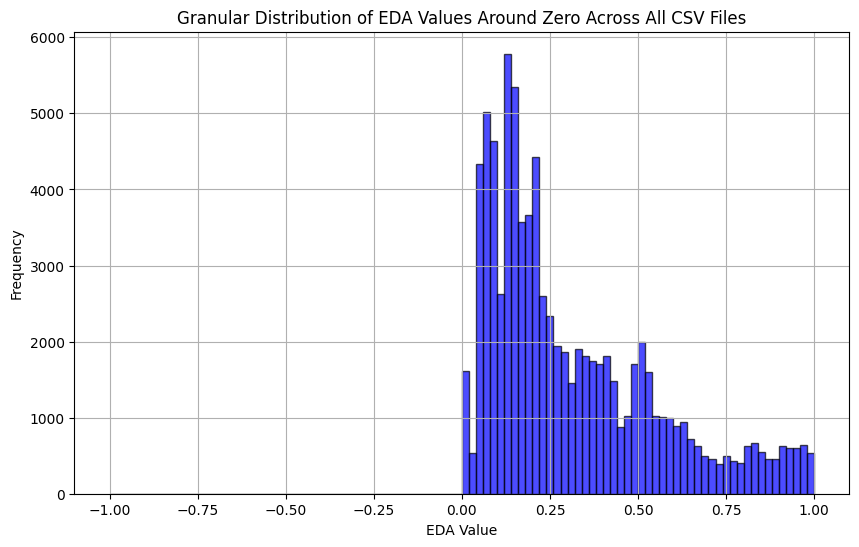

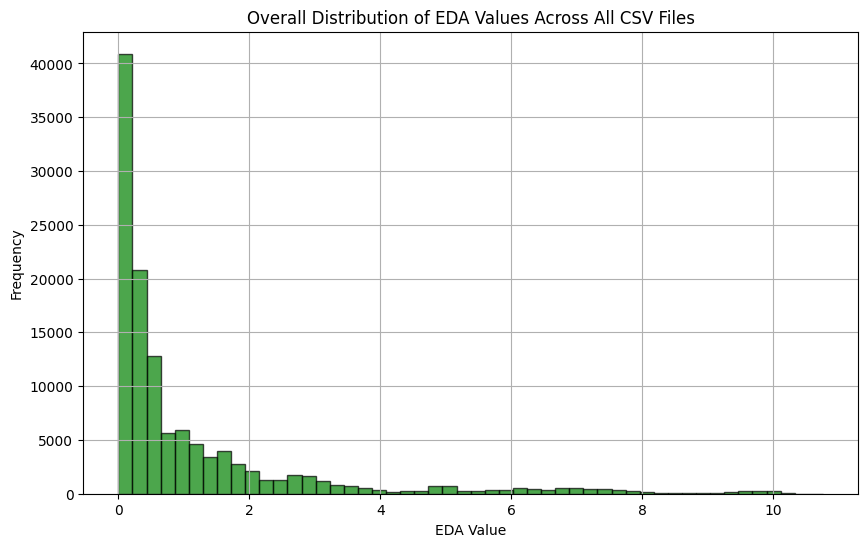

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_eda_distribution(csv_dir):
    """
    This function reads all CSV files in the specified directory,
    extracts 'eda' values from each file, and plots a histogram
    showing the distribution of EDA values across all files with 
    finer granularity around zero for better analysis.
    
    Args:
    - csv_dir (str): Path to the directory containing CSV files.
    
    Returns:
    - None
    """
    eda_values = []  
    
    # List all CSV files in the directory
    csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
    
    # Iterate through all CSV files
    for csv_file in csv_files:
        csv_path = os.path.join(csv_dir, csv_file)
        df = pd.read_csv(csv_path)
        
        # Check if 'eda' column exists
        if 'eda' not in df.columns:
            print(f"The file '{csv_file}' does not contain 'eda' column.")
            continue
        
        # Append all EDA values to the list
        eda_values.extend(df['eda'].values)
    
    # Convert the list to a pandas Series for easier plotting and analysis
    eda_series = pd.Series(eda_values)
    
    # Plot the histogram of EDA values with finer granularity around zero
    plt.figure(figsize=(10, 6))
    plt.hist(eda_series, bins=100, color='blue', alpha=0.7, edgecolor='black', range=(-1, 1))
    plt.xlabel('EDA Value')
    plt.ylabel('Frequency')
    plt.title('Granular Distribution of EDA Values Around Zero Across All CSV Files')
    plt.grid(True)
    plt.show()
    
    # Plot the full histogram for overall distribution
    plt.figure(figsize=(10, 6))
    plt.hist(eda_series, bins=50, color='green', alpha=0.7, edgecolor='black')
    plt.xlabel('EDA Value')
    plt.ylabel('Frequency')
    plt.title('Overall Distribution of EDA Values Across All CSV Files')
    plt.grid(True)
    plt.show()


csv_dir = "/work/AML_Project/Data/CSV_Files"  # Adjust the path as needed
plot_eda_distribution(csv_dir)


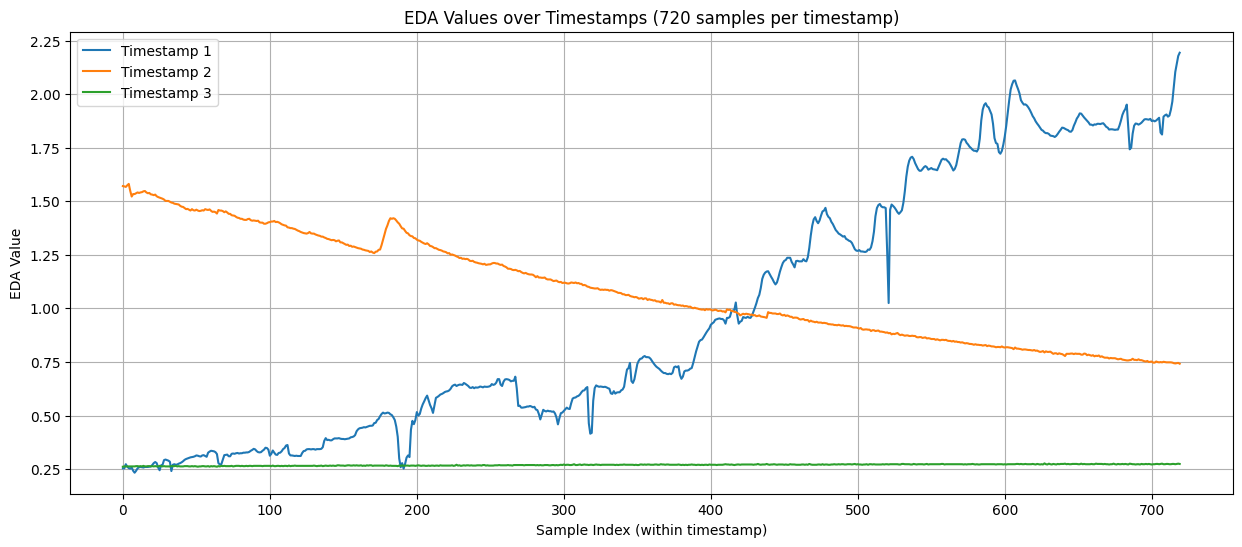

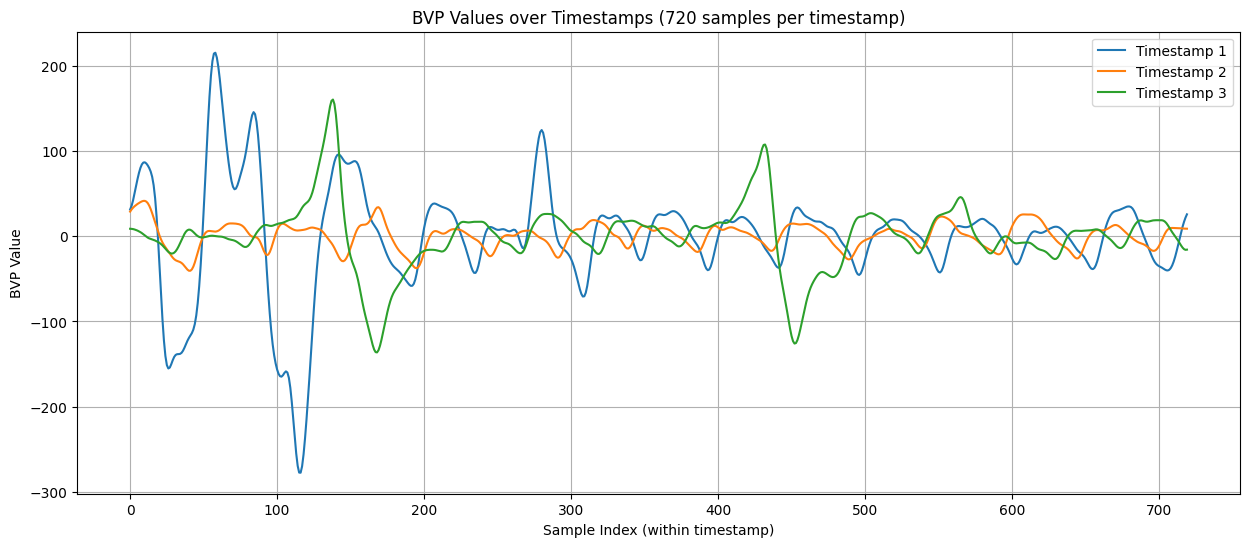

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

csv_dir = "/work/AML_Project/Data/CSV_Files" 

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Number of samples per timestamp
samples_per_timestamp = 720

# Iterate through all CSV files
for csv_file in csv_files:
    csv_path = os.path.join(csv_dir, csv_file)
    df = pd.read_csv(csv_path)
    
    # Check if 'eda' and 'bvp' columns exist
    if 'eda' not in df.columns or 'bvp' not in df.columns:
        print(f"The file '{csv_file}' does not contain 'eda' or 'bvp' columns.")
        continue
    
    print(f"Plotting for file: {csv_file}")
    
    # Plot EDA values
    plt.figure(figsize=(15, 6))
    for i in range(0, len(df), samples_per_timestamp):
        segment = df['eda'].iloc[i:i + samples_per_timestamp].reset_index(drop=True)
        plt.plot(segment, label=f'Timestamp {i // samples_per_timestamp + 1}')
    
    plt.xlabel('Sample Index (within timestamp)')
    plt.ylabel('EDA Value')
    plt.title(f'EDA Values over Timestamps (720 samples per timestamp) - {csv_file}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot BVP values
    plt.figure(figsize=(15, 6))
    for i in range(0, len(df), samples_per_timestamp):
        segment = df['bvp'].iloc[i:i + samples_per_timestamp].reset_index(drop=True)
        plt.plot(segment, label=f'Timestamp {i // samples_per_timestamp + 1}')
    
    plt.xlabel('Sample Index (within timestamp)')
    plt.ylabel('BVP Value')
    plt.title(f'BVP Values over Timestamps (720 samples per timestamp) - {csv_file}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:
import os
import pandas as pd


csv_dir = "/work/AML_Project/Data/CSV_Files"  

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Initialize a list to store EDA means from each file
eda_means = []

# Process each CSV file
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    df = pd.read_csv(file_path)
    
    # Check if 'eda' column exists
    if 'eda' in df.columns:
        eda_means.append(df['eda'].mean())  

# Compute overall mean of EDA across all files
overall_eda_mean = sum(eda_means) / len(eda_means) if eda_means else None


print(f"Overall Mean of EDA across all CSV files: {overall_eda_mean:.4f}")


Overall Mean of EDA across all CSV files: 1.1518


In [8]:
import pandas as pd
import os
import random
import numpy as np
from sklearn.preprocessing import StandardScaler

csv_dir = "/work/AML_Project/Data/CSV_Files"

# List all CSV files
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Set seed for reproducibility
random.seed(42)  
np.random.seed(42)  

# Function to create lagged features for each timeframe (720 samples)
def create_lagged_features_within_timeframe(df, lag=3):
    """
    Create lagged features within a single timeframe (720 samples).
    """
    for j in range(1, lag + 1):
        df[f'eda_lag_{j}'] = df['eda'].shift(j)
        df[f'bvp_lag_{j}'] = df['bvp'].shift(j)
    df.dropna(inplace=True)  
    return df


def process_patient_data(file_path, lag=3, timeframe_size=720):
    """
    Process the data for a single patient by splitting it into timeframes
    and creating lagged features within each timeframe.
    """
    df = pd.read_csv(file_path)
    processed_timeframes = []
    
    # Ensure the data length is a multiple of the timeframe size
    num_timeframes = len(df) // timeframe_size
    
    # Process each timeframe separately
    for i in range(num_timeframes):
        timeframe_df = df.iloc[i * timeframe_size:(i + 1) * timeframe_size].copy()
        processed_timeframe = create_lagged_features_within_timeframe(timeframe_df, lag=lag)
        processed_timeframes.append(processed_timeframe)
    
    # Concatenate all processed timeframes for this patient
    return pd.concat(processed_timeframes, axis=0)

# Step 1: Load and concatenate all data (for standardization)
all_data = pd.concat(
    [process_patient_data(os.path.join(csv_dir, file), lag=3) for file in csv_files],
    axis=0
)

# Step 2: Standardize both features and target (EDA)
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data)

# Convert standardized data back to DataFrame (optional)
all_data_scaled_df = pd.DataFrame(all_data_scaled, columns=all_data.columns)

# Step 3: Split standardized data into training and testing sets by files
# Randomly select 40 files for training and use the rest for testing
train_files = random.sample(csv_files, 40)
test_files = [f for f in csv_files if f not in train_files]

# Load and create lagged features for the training data
train_data = pd.concat(
    [process_patient_data(os.path.join(csv_dir, file), lag=3) for file in train_files],
    axis=0
)

# Load and create lagged features for the testing data
test_data = pd.concat(
    [process_patient_data(os.path.join(csv_dir, file), lag=3) for file in test_files],
    axis=0
)

# Step 4: Extract features and target from standardized data for train/test sets
X_train = train_data.drop(columns=['eda'])
y_train = train_data['eda']

X_test = test_data.drop(columns=['eda'])
y_test = test_data['eda']


print("Standardized Training data preview:")
print(X_train.head())

print("Standardized Testing data preview:")
print(X_test.head())


Standardized Training data preview:
     bvp  eda_lag_1  bvp_lag_1  eda_lag_2  bvp_lag_2  eda_lag_3  bvp_lag_3
3  65.13     7.7330      77.15     7.7010      88.77     7.6536     102.08
4  51.08     7.7496      65.13     7.7330      77.15     7.7010      88.77
5  34.02     7.7778      51.08     7.7496      65.13     7.7330      77.15
6  13.53     7.7816      34.02     7.7778      51.08     7.7496      65.13
7 -10.43     7.7829      13.53     7.7816      34.02     7.7778      51.08
Standardized Testing data preview:
     bvp  eda_lag_1  bvp_lag_1  eda_lag_2  bvp_lag_2  eda_lag_3  bvp_lag_3
3  -2.83    0.13703      -8.86    0.13831     -14.55    0.13831     -19.35
4   2.96    0.13703      -2.83    0.13703      -8.86    0.13831     -14.55
5   7.99    0.13831       2.96    0.13703      -2.83    0.13703      -8.86
6  11.89    0.13575       7.99    0.13831       2.96    0.13703      -2.83
7  14.48    0.13703      11.89    0.13575       7.99    0.13831       2.96


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features (lagged BVP) and Target (EDA)
X_train = train_data[['bvp_lag_1', 'bvp_lag_2', 'bvp_lag_3']]
y_train = train_data['eda']

X_test = test_data[['bvp_lag_1', 'bvp_lag_2', 'bvp_lag_3']]
y_test = test_data['eda']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² (Coefficient of Determination): {r2:.4f}")


Mean Squared Error (MSE): 1.6265
Mean Absolute Error (MAE): 1.0895
R² (Coefficient of Determination): -0.2625


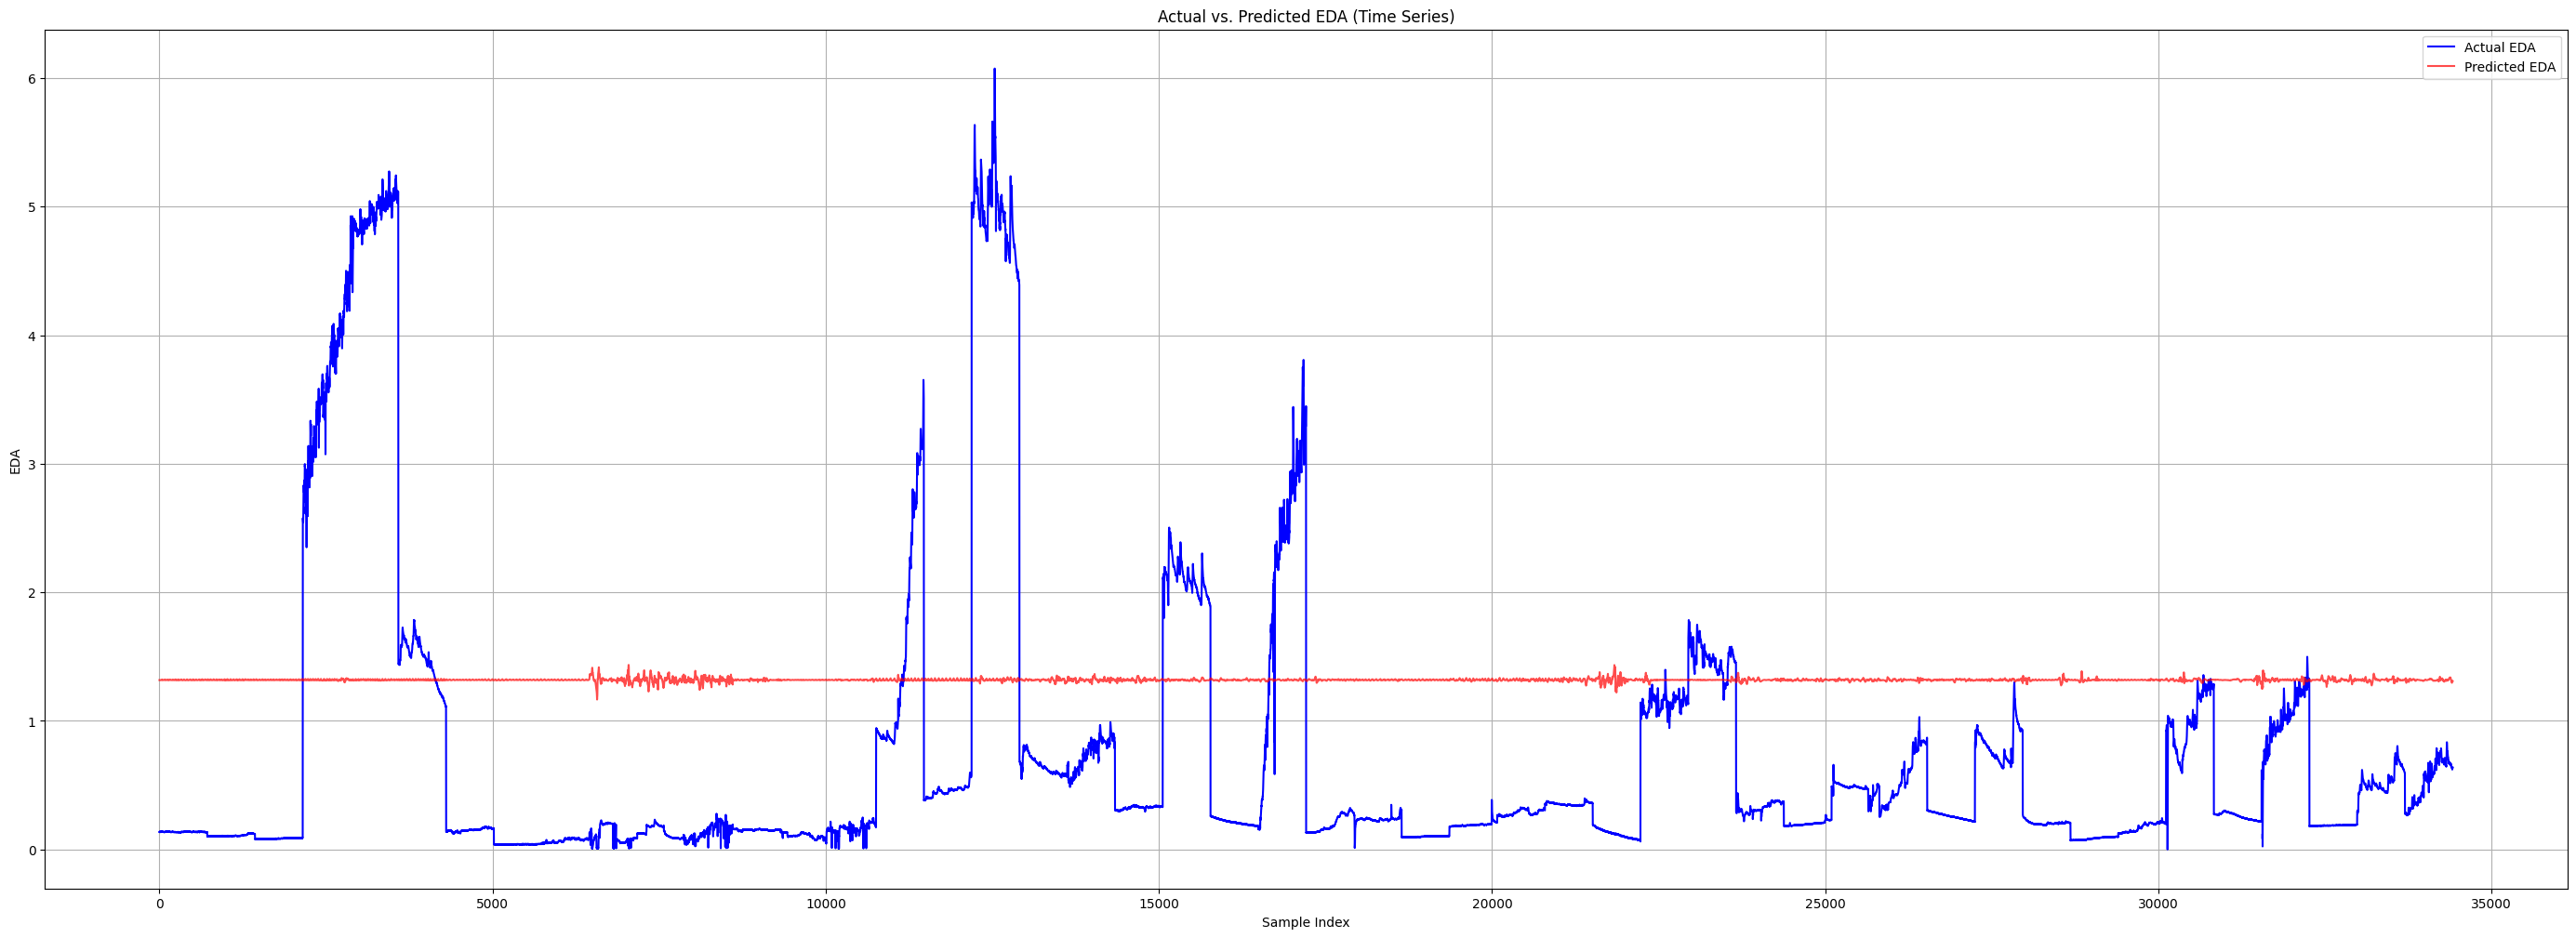

In [10]:
import matplotlib.pyplot as plt

num_samples_to_plot = 120000

plt.figure(figsize=(35,12))
plt.plot(y_test[:num_samples_to_plot].values, label='Actual EDA', color='blue')
plt.plot(y_pred[:num_samples_to_plot], label='Predicted EDA', color='red', alpha=0.7)

plt.title('Actual vs. Predicted EDA (Time Series)')
plt.xlabel('Sample Index')
plt.ylabel('EDA')
plt.legend()
plt.grid(True)
plt.show()


# Naive model with the mean


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the mean of EDA from the training data
mean_eda = train_data['eda'].mean()

# Naive predictions: Predict the mean value for every test sample
y_pred_naive = [mean_eda] * len(test_data)

# Actual EDA values for the test set
y_test = test_data['eda']

# Evaluate the performance of the naive model
mse_naive = mean_squared_error(y_test, y_pred_naive)
mae_naive = mean_absolute_error(y_test, y_pred_naive)
r2_naive = r2_score(y_test, y_pred_naive)

print("Naive Model (Mean Prediction) Evaluation: ")
print(f"Mean Squared Error (MSE): {mse_naive:.4f}")
print(f"Mean Absolute Error (MAE): {mae_naive:.4f}")
print(f"R² (Coefficient of Determination): {r2_naive:.4f}")


Naive Model (Mean Prediction) Evaluation: 
Mean Squared Error (MSE): 1.6264
Mean Absolute Error (MAE): 1.0895
R² (Coefficient of Determination): -0.2624


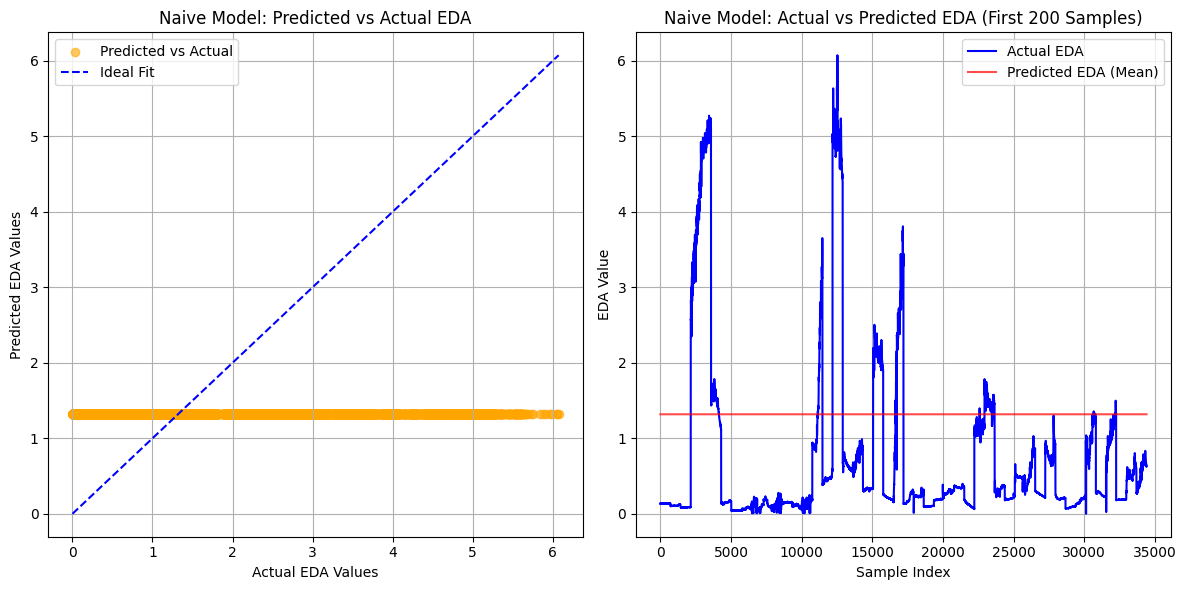

In [14]:
# Plot Actual vs. Predicted EDA Values
plt.figure(figsize=(12, 6))

# Scatter Plot: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_naive, color='orange', alpha=0.6, label='Predicted vs Actual')
min_val = min(y_test.min(), mean_eda)
max_val = max(y_test.max(), mean_eda)
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual EDA Values')
plt.ylabel('Predicted EDA Values')
plt.title('Naive Model: Predicted vs Actual EDA')
plt.legend()
plt.grid(True)

# Line Plot: Actual vs Predicted over Samples
plt.subplot(1, 2, 2)
num_samples_to_plot = min(120000, len(y_test))  
plt.plot(y_test[:num_samples_to_plot].values, label='Actual EDA', color='blue')
plt.plot(y_pred_naive[:num_samples_to_plot], label='Predicted EDA (Mean)', color='red', alpha=0.7)
plt.title('Naive Model: Actual vs Predicted EDA (First 200 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('EDA Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()